In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
import yfinance as yf
import seaborn as sns
sns.set(style='darkgrid')

import sys
sys.path.append('../src') 
from utils import stock_trading_strategy, stock_trading_strategy_backwards, plot_trading_strategy, download_stock_df, user_function, plot_candlestick
from utils import stock_trading_strategy_backwards

## Exploration of backwards grid trading

In [2]:
df_kweb = download_stock_df('kweb', price='Close')
# results_df = stock_trading_strategy_backwards(df_kweb, '2022-09-13', datetime.today().strftime('%Y-%m-%d'), initial_num_shares=100, buy_threshold=0.01, sell_threshold=0.01)
results_df = stock_trading_strategy_backwards(df_kweb, '2023-04-24', datetime.today().strftime('%Y-%m-%d'), initial_num_shares=100, buy_threshold=0.05, sell_threshold=0.05)

print(
    (results_df.iloc[-1]['total_stock_value'] + results_df.iloc[-1]['total_cash'])
    -
    (results_df.iloc[0]['total_stock_value'] + results_df.iloc[0]['total_cash'])
    ,
    (results_df.iloc[-1]['total_stock_value'] + results_df.iloc[-1]['total_cash'])
    /
    (results_df.iloc[0]['total_stock_value'] + results_df.iloc[0]['total_cash'])-1
)
results_df[results_df['action']!='Pass']

[*********************100%***********************]  1 of 1 completed
59.91823335137451 0.021662412755573568


,date,daily_price,action,num_shares_purchased,purchase_value,num_shares_sold,sell_value,total_num_shares,total_stock_value,total_cash
36,2023-06-14 00:00:00,29.250000,Sell,0.000000,0.000000,12.460654,364.474118,87.539346,2560.525882,364.474118
40,2023-06-21 00:00:00,27.559999,Purchase,12.505867,344.661676,0.000000,0.000000,100.045213,2757.246017,19.812441
54,2023-07-12 00:00:00,29.129999,Sell,0.000000,0.000000,12.505867,364.295883,87.539346,2550.021087,384.108324
66,2023-07-28 00:00:00,31.740000,Sell,0.000000,0.000000,11.837621,375.726085,75.701725,2402.772750,759.834409
76,2023-08-11 00:00:00,28.799999,Purchase,11.967420,344.661676,0.000000,0.000000,87.669145,2524.871313,415.172733
81,2023-08-18 00:00:00,26.860001,Purchase,12.831782,344.661676,0.000000,0.000000,100.500927,2699.454968,70.511056
87,2023-08-28 00:00:00,28.350000,Sell,0.000000,0.000000,12.831782,363.781029,87.669145,2485.420298,434.292085
103,2023-09-20 00:00:00,27.090000,Purchase,12.722838,344.661676,0.000000,0.000000,100.391983,2719.618832,89.630409
117,2023-10-10 00:00:00,28.510000,Sell,0.000000,0.000000,12.722838,362.728107,87.669145,2499.447348,452.358516
120,2023-10-13 00:00:00,27.280001,Purchase,12.634225,344.661676,0.000000,0.000000,100.303370,2736.276016,107.696839


In [3]:
def final_profit(results_df):
    profit = (
        (results_df.iloc[-1]['total_stock_value'] + results_df.iloc[-1]['total_cash'])
        -
        (results_df.iloc[0]['total_stock_value'] + results_df.iloc[0]['total_cash'])
    )
    return profit

l1 = []
l2 = []
for i in range(1,11):
    for j in range(1,11):
        results_df1 = stock_trading_strategy_backwards(df_kweb, '2022-09-13', datetime.today().strftime('%Y-%m-%d'), initial_num_shares=100, buy_threshold=i/100, sell_threshold=j/100)
        results_df2 = stock_trading_strategy_backwards(df_kweb, '2023-04-24', datetime.today().strftime('%Y-%m-%d'), initial_num_shares=100, buy_threshold=i/100, sell_threshold=j/100)
        l1.append((final_profit(results_df1), i/100, j/100))
        l2.append((final_profit(results_df2), i/100, j/100))
        l1.sort(reverse=True)
        l2.sort(reverse=True)
print(l1[0:20])
print(l2[0:20])


[(604.2806220806942, 0.02, 0.01), (596.1001868013141, 0.01, 0.1), (592.8382922206374, 0.01, 0.09), (579.3346082550761, 0.02, 0.08), (573.6082764188459, 0.01, 0.08), (556.1562927885398, 0.01, 0.07), (548.6465040420208, 0.01, 0.01), (548.0105094287424, 0.02, 0.02), (539.8926607014323, 0.01, 0.04), (532.2180122713175, 0.01, 0.05), (530.5087692646794, 0.01, 0.03), (528.984537763492, 0.01, 0.06), (528.3509296806569, 0.02, 0.03), (521.279079222757, 0.02, 0.07), (519.9385127607825, 0.02, 0.04), (518.804905723553, 0.01, 0.02), (518.1915400479211, 0.03, 0.01), (511.35303646723787, 0.02, 0.09), (510.4526277110954, 0.02, 0.06), (501.477735984839, 0.03, 0.02)]
[(296.9698633455546, 0.01, 0.01), (286.0540294643988, 0.01, 0.02), (271.49257152642076, 0.01, 0.03), (250.5148261268214, 0.01, 0.04), (211.96233321777981, 0.01, 0.05), (193.61759962549604, 0.01, 0.06), (191.05199367787282, 0.02, 0.01), (157.2738683692305, 0.01, 0.07), (154.7554617939286, 0.03, 0.01), (152.32033903256115, 0.02, 0.02), (149.57

In [4]:
df_cweb = download_stock_df('cweb', price='Close')
l1 = []
l2 = []
for i in range(1,11):
    for j in range(1,11):
        results_df1 = stock_trading_strategy_backwards(df_cweb, '2022-10-10', datetime.today().strftime('%Y-%m-%d'), initial_num_shares=100, buy_threshold=i/100, sell_threshold=j/100)
        results_df2 = stock_trading_strategy_backwards(df_cweb, '2023-05-23', datetime.today().strftime('%Y-%m-%d'), initial_num_shares=100, buy_threshold=i/100, sell_threshold=j/100)
        l1.append((final_profit(results_df1), i/100, j/100))
        l2.append((final_profit(results_df2), i/100, j/100))
        l1.sort(reverse=True)
        l2.sort(reverse=True)
print(l1[0:20])
print(l2[0:20])

[*********************100%***********************]  1 of 1 completed
[(2323.1047908311484, 0.07, 0.02), (2211.911315144278, 0.05, 0.1), (2138.6679157866492, 0.05, 0.09), (2131.240070741507, 0.07, 0.09), (2125.7397600348577, 0.07, 0.05), (2120.605858225581, 0.05, 0.08), (2113.107274902187, 0.03, 0.08), (2109.271565712207, 0.03, 0.05), (2108.1075937829446, 0.07, 0.01), (2092.999002150418, 0.07, 0.06), (2081.382903907881, 0.07, 0.04), (2075.966524651345, 0.03, 0.09), (2074.77561031223, 0.08, 0.03), (2072.4942294318625, 0.05, 0.05), (2065.281711828512, 0.07, 0.03), (2051.181837753262, 0.08, 0.04), (2041.6887803638037, 0.08, 0.02), (2033.1718781051695, 0.05, 0.01), (2028.5844443843207, 0.07, 0.08), (2025.5991073603227, 0.02, 0.05)]
[(1033.852160724231, 0.02, 0.05), (1021.8184039657017, 0.02, 0.1), (1018.2104328298356, 0.02, 0.09), (982.1416096390767, 0.02, 0.07), (976.7407424748108, 0.02, 0.06), (935.9017604908495, 0.02, 0.03), (934.900316070185, 0.03, 0.02), (925.469931951453, 0.02, 0.08),

In [5]:
df_cof = download_stock_df('cof', price='Close')
l1 = []
l2 = []
for i in range(1,11):
    for j in range(1,11):
        results_df1 = stock_trading_strategy_backwards(df_cof, '2022-09-19', datetime.today().strftime('%Y-%m-%d'), initial_num_shares=100, buy_threshold=i/100, sell_threshold=j/100)
        results_df2 = stock_trading_strategy_backwards(df_cof, '2023-03-09', datetime.today().strftime('%Y-%m-%d'), initial_num_shares=100, buy_threshold=i/100, sell_threshold=j/100)
        l1.append((final_profit(results_df1), i/100, j/100))
        l2.append((final_profit(results_df2), i/100, j/100))
        l1.sort(reverse=True)
        l2.sort(reverse=True)
print(l1[0:20])
print(l2[0:20])

[*********************100%***********************]  1 of 1 completed
[(1540.6601983619585, 0.01, 0.04), (1501.2929321216434, 0.01, 0.05), (1499.0819105475948, 0.01, 0.06), (1449.7094766014288, 0.01, 0.03), (1423.9443059897294, 0.01, 0.07), (1333.6036385913649, 0.01, 0.09), (1298.3553922525534, 0.01, 0.08), (1201.1522517409794, 0.01, 0.01), (1160.7174132525597, 0.01, 0.02), (1046.2843598724721, 0.01, 0.1), (932.9141606124795, 0.02, 0.07), (918.2086677136613, 0.02, 0.02), (916.7727296493431, 0.02, 0.06), (911.9350429917231, 0.03, 0.01), (871.2391348599122, 0.02, 0.09), (859.8888496716972, 0.02, 0.05), (851.1686026771422, 0.02, 0.08), (816.4419279450922, 0.02, 0.04), (811.014948620792, 0.02, 0.01), (765.1339128265045, 0.03, 0.02)]
[(867.7439408960181, 0.01, 0.07), (850.0457312059152, 0.01, 0.06), (846.20573292052, 0.01, 0.08), (796.4987152701033, 0.01, 0.05), (769.6609331441723, 0.01, 0.04), (711.8563195267816, 0.01, 0.03), (689.741236629221, 0.01, 0.09), (657.5258518419869, 0.01, 0.1), (

## Real transaction applying the grid trade strategy

[*********************100%***********************]  1 of 1 completed


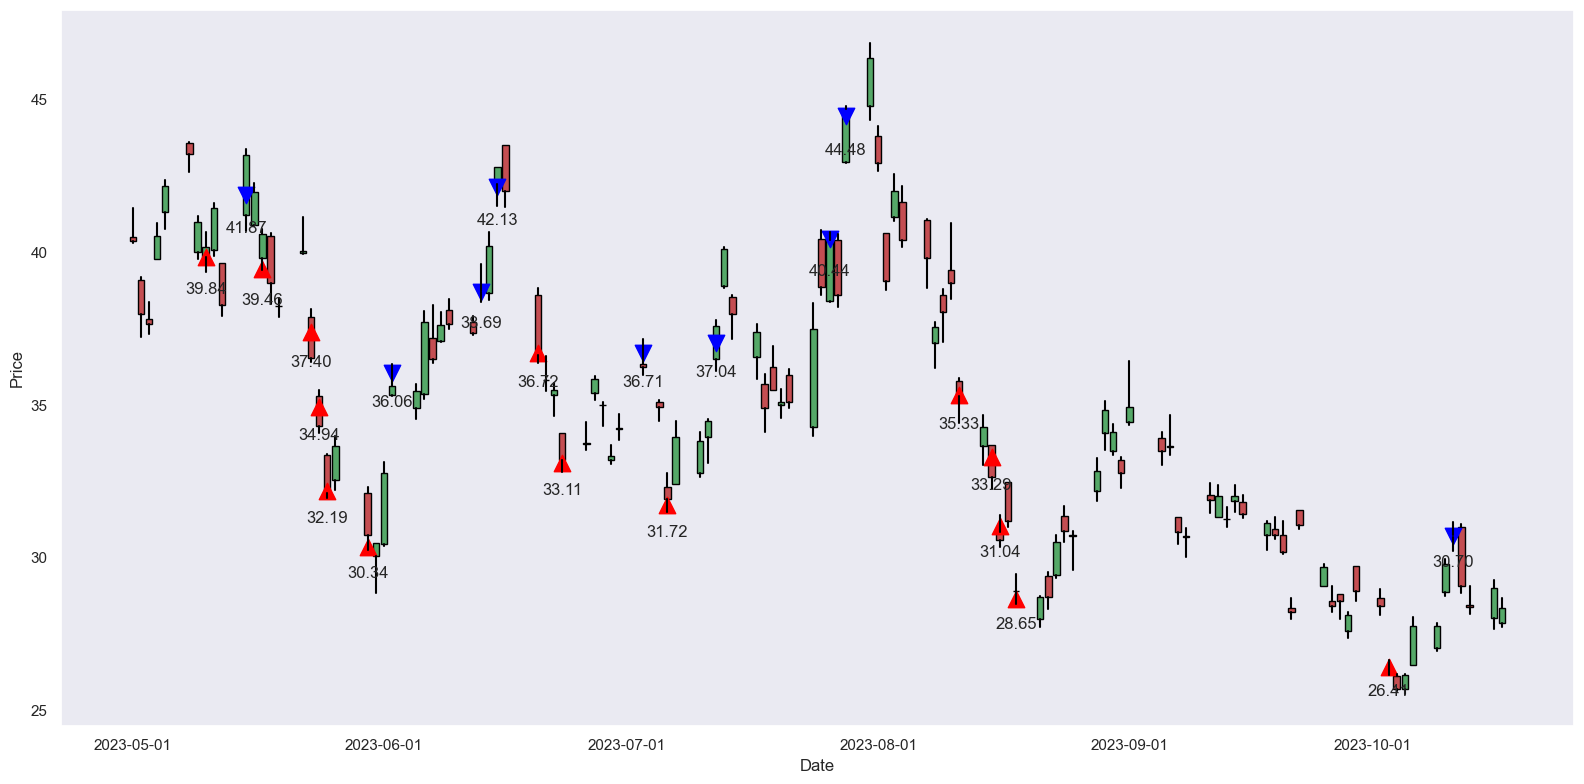

In [6]:
# create a custom function for the Candlestick chart

import matplotlib.dates as mdates

df_yinn = yf.download('yinn'.upper(), start='2023-05-01', end=datetime.today().strftime('%Y-%m-%d'))
df_yinn = df_yinn.reset_index()
df_yinn.columns = df_yinn.columns.str.lower()
df_yinn['date'] = pd.to_datetime(df_yinn['date'])
df_yinn.set_index('date', inplace=True)

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(16, 8))
ax.grid(True, alpha=0.5)

# Convert dates to mdates
mdates_df_yinn = df_yinn.reset_index()
mdates_df_yinn['date'] = mdates.date2num(mdates_df_yinn['date'])

# Plot candlesticks
for index, row in mdates_df_yinn.iterrows():
    open_price = row['open']
    close_price = row['close']
    high_price = row['high']
    low_price = row['low']
    date = row['date']
    
    if close_price >= open_price:
        color = 'g'  # Green for bullish
        rect_height = close_price - open_price
        bottom = open_price
    else:
        color = 'r'  # Red for bearish
        rect_height = open_price - close_price
        bottom = close_price
    
    # Plot candlestick body
    ax.add_patch(plt.Rectangle((date - 0.4, bottom), 0.8, rect_height,
                                facecolor=color, edgecolor='black'))
    
    # Plot upper wick
    ax.plot([date, date], [high_price, max(open_price, close_price)],
            color='black')
    
    # Plot lower wick
    ax.plot([date, date], [low_price, min(open_price, close_price)],
            color='black')

# Customize the appearance and layout of the plot
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.grid()

# Show the plot

result = pd.DataFrame({
    'action':[
        'Purchase',
        'Sell',
        'Purchase',
        'Purchase',
        'Purchase',
        'Purchase',
        'Purchase',
        'Sell',
        'Sell',
        'Sell',
        'Purchase',
        'Purchase',
        'Sell',
        'Purchase',
        'Sell',
        'Sell',
        'Sell',
        'Purchase',
        'Purchase',
        'Purchase',
        'Purchase',
        'Purchase',
        'Sell',
    ],
    'date':['2023-05-10',
            '2023-05-15',
            '2023-05-17',
            '2023-05-23',
            '2023-05-24',
            '2023-05-25',
            '2023-05-30',
            '2023-06-02',
            '2023-06-13',
            '2023-06-15',
            '2023-06-20',
            '2023-06-23',
            '2023-07-03',
            '2023-07-06',
            '2023-07-12',
            '2023-07-26',
            '2023-07-28',
            '2023-08-11',
            '2023-08-15',
            '2023-08-16',
            '2023-08-18',
            '2023-10-03',
            '2023-10-11',
           ],
    'daily_price':[
        39.84,
        41.87,
        39.46,
        37.4,
        34.94,
        32.19,
        30.34,
        36.06,
        38.69,
        42.13,
        36.72,
        33.11,
        36.71,
        31.72,
        37.04,
        40.44,
        44.48,
        35.33,
        33.29,
        31.04,
        28.65,
        26.41,
        30.7,
    ]
}
)

result['date'] = pd.to_datetime(result['date'])

# plot the purchase actions as red dots
purchases = result[result['action'] == 'Purchase']
plt.scatter(purchases['date'], purchases['daily_price'], s=140, marker='^', color='red', label='Purchase')

# plot the sell actions as blue dots
sells = result[result['action'] == 'Sell']
plt.scatter(sells['date'], sells['daily_price'], s=140, marker='v', color='blue', label='Sell')

for index, row in sells.iterrows():
    # plt.text(row['date'], row['daily_price'], row['daily_price'], ha='center', va='bottom')
    plt.annotate(f"{row['daily_price']:.2f}", xy=(row['date'], row['daily_price']), 
                 xytext=(row['date'], row['daily_price']*0.98), ha='center', va='top')
for index, row in purchases.iterrows():
    # plt.text(row['date'], row['daily_price'], row['daily_price'], ha='center', va='bottom')
    plt.annotate(f"{row['daily_price']:.2f}", xy=(row['date'], row['daily_price']), 
                 xytext=(row['date'], row['daily_price']*0.98), ha='center', va='top')
plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed


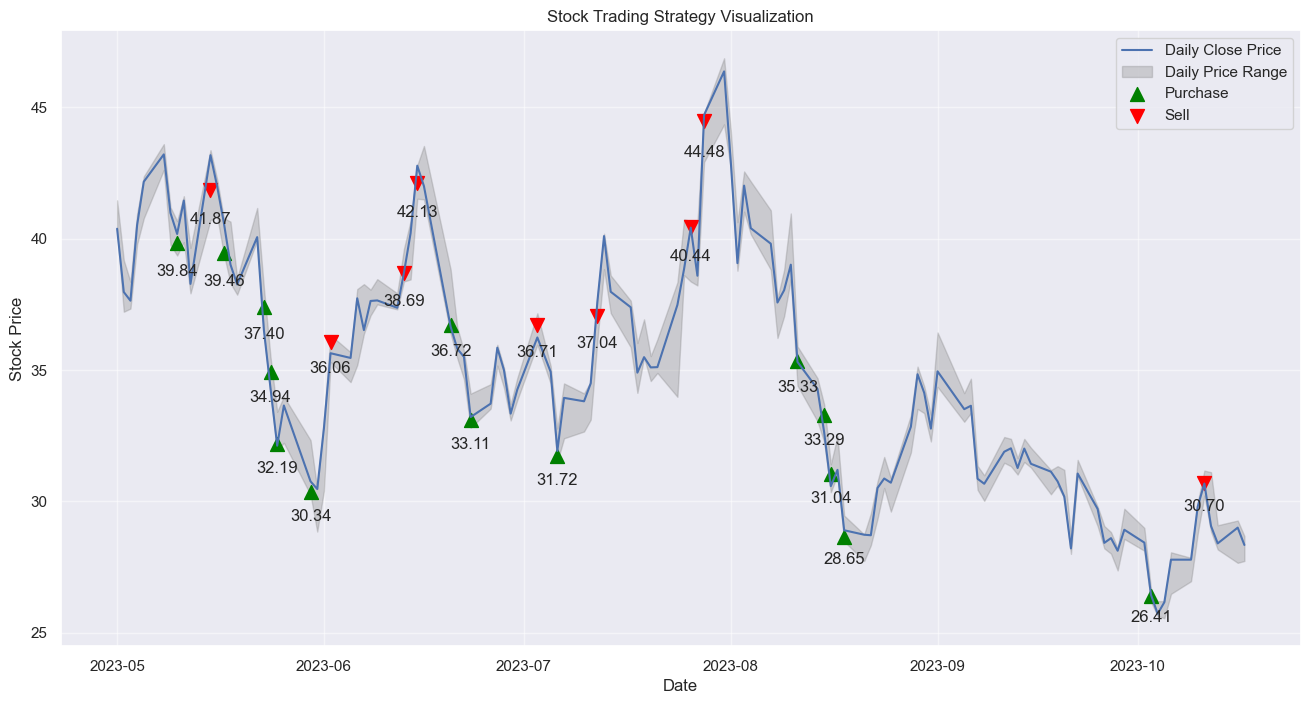

In [7]:
# sample plot using actual trading data

df_yinn = yf.download('yinn'.upper(), start='2023-05-01', end=datetime.today().strftime('%Y-%m-%d'))
df_yinn = df_yinn.reset_index()

plt.figure(figsize=(16, 8))
plt.grid(True, alpha=0.5)

plt.plot(df_yinn['Date'], df_yinn['Close'], label='Daily Close Price')
# plt.plot(df_yinn['Date'], df_yinn['High'], color='green', label='Highest Price')
# plt.plot(df_yinn['Date'], df_yinn['Low'], color='red', label='Lowest Price')

# Shading the region between the highest and lowest prices
plt.fill_between(df_yinn['Date'], df_yinn['Low'], df_yinn['High'], color='gray', alpha=0.3, label='Daily Price Range')


result = pd.DataFrame({
    'action':[
        'Purchase',
        'Sell',
        'Purchase',
        'Purchase',
        'Purchase',
        'Purchase',
        'Purchase',
        'Sell',
        'Sell',
        'Sell',
        'Purchase',
        'Purchase',
        'Sell',
        'Purchase',
        'Sell',
        'Sell',
        'Sell',
        'Purchase',
        'Purchase',
        'Purchase',
        'Purchase',
        'Purchase',
        'Sell',
    ],
    'date':['2023-05-10',
            '2023-05-15',
            '2023-05-17',
            '2023-05-23',
            '2023-05-24',
            '2023-05-25',
            '2023-05-30',
            '2023-06-02',
            '2023-06-13',
            '2023-06-15',
            '2023-06-20',
            '2023-06-23',
            '2023-07-03',
            '2023-07-06',
            '2023-07-12',
            '2023-07-26',
            '2023-07-28',
            '2023-08-11',
            '2023-08-15',
            '2023-08-16',
            '2023-08-18',
            '2023-10-03',
            '2023-10-11',
           ],
    'daily_price':[
        39.84,
        41.87,
        39.46,
        37.4,
        34.94,
        32.19,
        30.34,
        36.06,
        38.69,
        42.13,
        36.72,
        33.11,
        36.71,
        31.72,
        37.04,
        40.44,
        44.48,
        35.33,
        33.29,
        31.04,
        28.65,
        26.41,
        30.7,
    ]
}
)

result['date'] = pd.to_datetime(result['date'])

# plot the purchase actions as red dots
purchases = result[result['action'] == 'Purchase']
plt.scatter(purchases['date'], purchases['daily_price'], s=100, marker='^', color='green', label='Purchase')

# plot the sell actions as blue dots
sells = result[result['action'] == 'Sell']
plt.scatter(sells['date'], sells['daily_price'], s=100, marker='v', color='red', label='Sell')

for index, row in sells.iterrows():
    # plt.text(row['date'], row['daily_price'], row['daily_price'], ha='center', va='bottom')
    plt.annotate(f"{row['daily_price']:.2f}", xy=(row['date'], row['daily_price']), 
                 xytext=(row['date'], row['daily_price']*0.98), ha='center', va='top')
for index, row in purchases.iterrows():
    # plt.text(row['date'], row['daily_price'], row['daily_price'], ha='center', va='bottom')
    plt.annotate(f"{row['daily_price']:.2f}", xy=(row['date'], row['daily_price']), 
                 xytext=(row['date'], row['daily_price']*0.98), ha='center', va='top')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Trading Strategy Visualization')
plt.legend()

plt.show()

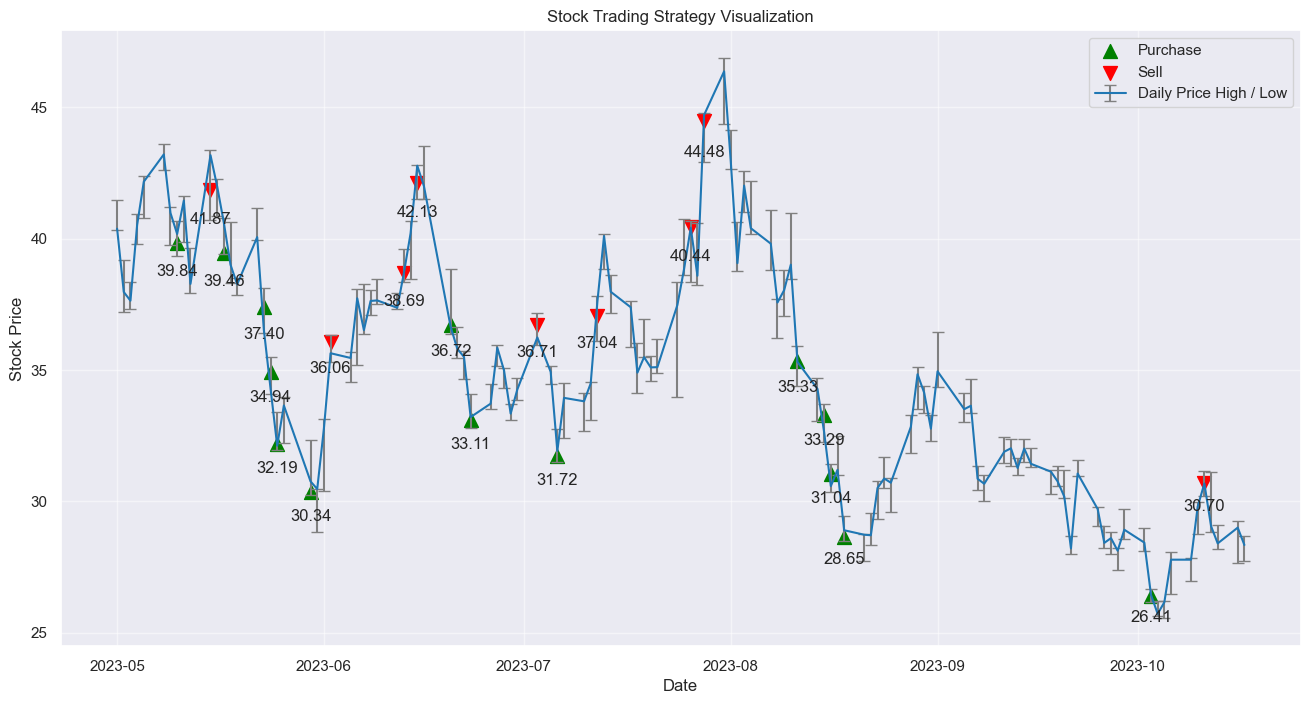

In [8]:
# Plotting error bars for highest and lowest prices

plt.figure(figsize=(16, 8))
plt.grid(True, alpha=0.5)
plt.errorbar(df_yinn['Date'],
             df_yinn['Close'],
             yerr=[df_yinn['Close'] - df_yinn['Low'], df_yinn['High'] - df_yinn['Close']],
             color='#1f77b4',
             ecolor='gray',
             label='Daily Price High / Low',
             capsize=4,
            )

# plot the purchase actions as red dots
purchases = result[result['action'] == 'Purchase']
plt.scatter(purchases['date'], purchases['daily_price'], s=100, marker='^', color='green', label='Purchase')

# plot the sell actions as blue dots
sells = result[result['action'] == 'Sell']
plt.scatter(sells['date'], sells['daily_price'], s=100, marker='v', color='red', label='Sell')

for index, row in sells.iterrows():
    # plt.text(row['date'], row['daily_price'], row['daily_price'], ha='center', va='bottom')
    plt.annotate(f"{row['daily_price']:.2f}", xy=(row['date'], row['daily_price']), 
                 xytext=(row['date'], row['daily_price']*0.98), ha='center', va='top')
for index, row in purchases.iterrows():
    # plt.text(row['date'], row['daily_price'], row['daily_price'], ha='center', va='bottom')
    plt.annotate(f"{row['daily_price']:.2f}", xy=(row['date'], row['daily_price']), 
                 xytext=(row['date'], row['daily_price']*0.98), ha='center', va='top')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Trading Strategy Visualization')
plt.legend()

plt.show()

## Test the effectiveness of grid trade on all SP500 stocks

In [49]:
def test_sp500(th1, th2, m):
    sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
    symbols = sp500.Symbol.to_list()
    today_date = datetime.today().strftime('%Y-%m-%d')
    initial_cash = 10000
    investment = 1000
    list_stock = []
    list_profit = []
    list_max_loss = []
    list_number_actions = []
    list_minimal_cash_reserve = []
    list_price_change = []
    for stock_name in symbols:
        stock_df = download_stock_df(stock_name)
        try:
            result = stock_trading_strategy(stock_df, '2018-01-01', today_date, initial_cash, investment, th1, th2, m)
            profit = ((result.iloc[-1]['total_stock_value'] + result.iloc[-1]['total_cash'])-initial_cash)
            underlying_stock_price_change = (result.iloc[-1]['daily_price']-result.iloc[0]['daily_price'])/result.iloc[0]['daily_price']
            max_loss = (result['total_stock_value']+result['total_cash']).min() - initial_cash
            number_actions = result[result['action'].isin(['Purchase','Sell'])].shape[0]
            minimal_cash_reserve = result['total_cash'].min()
            list_stock.append(stock_name)
            list_profit.append(profit)
            list_price_change.append(underlying_stock_price_change)
            list_max_loss.append(max_loss)
            list_minimal_cash_reserve.append(minimal_cash_reserve)
            list_number_actions.append(number_actions)
        except:
            print('error with ', stock_name)
            symbols.remove(stock_name)
        
    try_remove_list = [e for e in sp500.Symbol.to_list() if e not in list_stock]
    for stock_name in try_remove_list:
        stock_name = stock_name.replace('.','-')
        try:
            result = stock_trading_strategy(stock_df, '2018-01-01', today_date, initial_cash, investment, th1, th2, m)
            profit = ((result.iloc[-1]['total_stock_value'] + result.iloc[-1]['total_cash'])-initial_cash)
            underlying_stock_price_change = (result.iloc[-1]['daily_price']-result.iloc[0]['daily_price'])/result.iloc[0]['daily_price']
            max_loss = (result['total_stock_value']+result['total_cash']).min() - initial_cash
            number_actions = result[result['action'].isin(['Purchase','Sell'])].shape[0]
            minimal_cash_reserve = result['total_cash'].min()
            list_stock.append(stock_name)
            list_profit.append(profit)
            list_price_change.append(underlying_stock_price_change)
            list_max_loss.append(max_loss)
            list_minimal_cash_reserve.append(minimal_cash_reserve)
            list_number_actions.append(number_actions)
        except:
            print('error with ', stock_name)
            try_remove_list.remove(stock_name)

    df_all_stock = pd.DataFrame(
        {
            'stock_name': list_stock,
            'start_date': ['2018-01-01']*len(list_stock),
            'end_date': [today_date]*len(list_stock),
            'initial_cash': [initial_cash]*len(list_stock),
            'investment': [investment]*len(list_stock),
            'buy_threshold': [th1]*len(list_stock),
            'sell_threshold': [th2]*len(list_stock),
            'profit': list_profit,
            'underlying_stock_price_change': list_price_change,
            'max_loss': list_max_loss,
            'minimal_cash_reserve': list_minimal_cash_reserve,
            'number_actions': list_number_actions
        }
    )
    print('Numbers of stock tested:', len(list_stock)+len(try_remove_list))
    print(df_all_stock.shape)
    return df_all_stock

In [24]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
symbols = sp500.Symbol.to_list()
today_date = datetime.today().strftime('%Y-%m-%d')
initial_cash = 10000
investment = 1000
th1 = 0.05
th2 = 0.05
list_stock = []
list_profit = []
list_max_loss = []
list_number_actions = []
list_minimal_cash_reserve = []
list_price_change = []
for stock_name in symbols:
    stock_df = download_stock_df(stock_name)
    try:
        result = stock_trading_strategy(stock_df, '2018-01-01', today_date, initial_cash, investment, th1, th2)
        profit = ((result.iloc[-1]['total_stock_value'] + result.iloc[-1]['total_cash'])-initial_cash)
        underlying_stock_price_change = (result.iloc[-1]['daily_price']-result.iloc[0]['daily_price'])/result.iloc[0]['daily_price']
        max_loss = (result['total_stock_value']+result['total_cash']).min() - initial_cash
        number_actions = result[result['action'].isin(['Purchase','Sell'])].shape[0]
        minimal_cash_reserve = result['total_cash'].min()
        list_stock.append(stock_name)
        list_profit.append(profit)
        list_price_change.append(underlying_stock_price_change)
        list_max_loss.append(max_loss)
        list_minimal_cash_reserve.append(minimal_cash_reserve)
        list_number_actions.append(number_actions)
    except:
        print('error with ', stock_name)
        symbols.remove(stock_name)
    


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [26]:
df_all_stock = pd.DataFrame(
    {
        'stock_name': list_stock,
        'start_date': ['2018-01-01']*len(list_stock),
        'end_date': [today_date]*len(list_stock),
        'initial_cash': [initial_cash]*len(list_stock),
        'investment': [investment]*len(list_stock),
        'buy_threshold': [th1]*len(list_stock),
        'sell_threshold': [th2]*len(list_stock),
        'profit': list_profit,
        'underlying_stock_price_change': list_price_change,
        'max_loss': list_max_loss,
        'minimal_cash_reserve': list_minimal_cash_reserve,
        'number_actions': list_number_actions
    }
)
print('Numbers of stock tested:', len(symbols))
print(df_all_stock.shape)
df_all_stock.head()

Numbers of stock tested: 501
(499, 12)


,stock_name,start_date,end_date,initial_cash,investment,buy_threshold,sell_threshold,profit,underlying_stock_price_change,max_loss,minimal_cash_reserve,number_actions
0,MMM,2018-01-01,2023-05-12,10000,1000,0.05,0.05,-609.882795,-0.421432,-1050.236856,2225.779480,51
1,AOS,2018-01-01,2023-05-12,10000,1000,0.05,0.05,892.788393,0.461073,-599.367720,5191.194121,28
2,ABT,2018-01-01,2023-05-12,10000,1000,0.05,0.05,626.144051,0.294097,-316.622828,6272.048452,18
3,ABBV,2018-01-01,2023-05-12,10000,1000,0.05,0.05,698.942980,0.667490,-344.269699,6277.779801,22
4,ACN,2018-01-01,2023-05-12,10000,1000,0.05,0.05,607.673105,0.276771,-841.447910,5052.757184,18


In [29]:
list_profit = []
list_max_loss = []
list_number_actions = []
list_minimal_cash_reserve = []
list_price_change = []
try_remove_list = [e for e in sp500.Symbol.to_list() if e not in list_stock]
for stock_name in try_remove_list:
    stock_name = stock_name.replace('.','-')
    try:
        result = stock_trading_strategy(stock_df, '2018-01-01', today_date, initial_cash, investment, th1, th2)
        profit = ((result.iloc[-1]['total_stock_value'] + result.iloc[-1]['total_cash'])-initial_cash)
        underlying_stock_price_change = (result.iloc[-1]['daily_price']-result.iloc[0]['daily_price'])/result.iloc[0]['daily_price']
        max_loss = (result['total_stock_value']+result['total_cash']).min() - initial_cash
        number_actions = result[result['action'].isin(['Purchase','Sell'])].shape[0]
        minimal_cash_reserve = result['total_cash'].min()
        list_profit.append(profit)
        list_price_change.append(underlying_stock_price_change)
        list_max_loss.append(max_loss)
        list_minimal_cash_reserve.append(minimal_cash_reserve)
        list_number_actions.append(number_actions)
    except:
        print('error with ', stock_name)
        try_remove_list.remove(stock_name)
        
df_all_stock = pd.concat([df_all_stock, 
                          pd.DataFrame(
                              {
                                  'stock_name': try_remove_list,
                                  'start_date': ['2018-01-01']*len(try_remove_list),
                                  'end_date': [today_date]*len(try_remove_list),
                                  'initial_cash': [initial_cash]*len(try_remove_list),
                                  'investment': [investment]*len(try_remove_list),
                                  'buy_threshold': [th1]*len(try_remove_list),
                                  'sell_threshold': [th2]*len(try_remove_list),
                                  'profit': list_profit,
                                  'underlying_stock_price_change': list_price_change,
                                  'max_loss': list_max_loss,
                                  'minimal_cash_reserve': list_minimal_cash_reserve,
                                  'number_actions': list_number_actions
                              }
                          )
                         ]
                        )
print('Numbers of stock tested:', len(list_stock)+len(try_remove_list))
print(df_all_stock.shape)
df_all_stock.head()

Numbers of stock tested: 503
(503, 12)


,stock_name,start_date,end_date,initial_cash,investment,buy_threshold,sell_threshold,profit,underlying_stock_price_change,max_loss,minimal_cash_reserve,number_actions
0,MMM,2018-01-01,2023-05-12,10000,1000,0.05,0.05,-609.882795,-0.421432,-1050.236856,2225.779480,51
1,AOS,2018-01-01,2023-05-12,10000,1000,0.05,0.05,892.788393,0.461073,-599.367720,5191.194121,28
2,ABT,2018-01-01,2023-05-12,10000,1000,0.05,0.05,626.144051,0.294097,-316.622828,6272.048452,18
3,ABBV,2018-01-01,2023-05-12,10000,1000,0.05,0.05,698.942980,0.667490,-344.269699,6277.779801,22
4,ACN,2018-01-01,2023-05-12,10000,1000,0.05,0.05,607.673105,0.276771,-841.447910,5052.757184,18


In [45]:
df_all_stock[(df_all_stock['profit']>2500) & (df_all_stock['max_loss']>=-1000)]

,stock_name,start_date,end_date,initial_cash,investment,buy_threshold,sell_threshold,profit,underlying_stock_price_change,max_loss,minimal_cash_reserve,number_actions
67,BIIB,2018-01-01,2023-05-12,10000,1000,0.05,0.05,4443.455749,0.049321,-122.204254,4441.987316,82
97,CDAY,2018-01-01,2023-05-12,10000,1000,0.05,0.05,3355.349819,-0.155049,-934.471224,4219.852976,97
199,FISV,2018-01-01,2023-05-12,10000,1000,0.05,0.05,2520.992546,0.022328,-569.878013,5179.218031,82
369,PCG,2018-01-01,2023-05-12,10000,1000,0.05,0.05,2551.466644,0.576535,-133.693777,6999.757221,68


In [47]:
df_all_stock[(df_all_stock['profit']>df_all_stock['underlying_stock_price_change']*10000) & (df_all_stock['max_loss']>=-1000)]

,stock_name,start_date,end_date,initial_cash,investment,buy_threshold,sell_threshold,profit,underlying_stock_price_change,max_loss,minimal_cash_reserve,number_actions
7,ADBE,2018-01-01,2023-05-12,10000,1000,0.05,0.05,1065.685840,0.027212,-5.181792,7411.191480,32
14,AKAM,2018-01-01,2023-05-12,10000,1000,0.05,0.05,645.202216,-0.109051,-4.606102,7421.677544,24
17,ARE,2018-01-01,2023-05-12,10000,1000,0.05,0.05,1146.799424,-0.241771,-586.396924,5110.875016,60
19,ALLE,2018-01-01,2023-05-12,10000,1000,0.05,0.05,2318.103459,-0.133905,-714.872809,5209.899428,77
20,LNT,2018-01-01,2023-05-12,10000,1000,0.05,0.05,1128.013342,-0.016642,-433.769618,6108.596034,41
...,...,...,...,...,...,...,...,...,...,...,...,...
433,TTWO,2018-01-01,2023-05-12,10000,1000,0.05,0.05,1610.159800,-0.025338,-154.478081,7064.113966,51
455,UDR,2018-01-01,2023-05-12,10000,1000,0.05,0.05,2022.019202,-0.133562,-859.372042,4099.413560,67
480,WEC,2018-01-01,2023-05-12,10000,1000,0.05,0.05,1564.333586,0.026948,-78.695025,7820.683314,48
489,WTW,2018-01-01,2023-05-12,10000,1000,0.05,0.05,1163.266986,0.110613,-670.891036,5109.434409,36


In [50]:
strategy_dfs = []
for th1 in [0.05, 0.07, 0.1]:
    for th2 in [0.05, 0.1, 0.15, 0.3]:
        for m in [1, 1.05]:
            df_strategy = test_sp500(th1, th2, m)
            strategy_dfs.append(df_strategy)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BF.B: No data found for this date range, symbol may be delisted
error with  BF.B
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRK.B: No timezone found, symbol may be delisted
error with  BRK.B
[*********************100%***********************]  1 of 1 completed
[*************

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Numbers of stock tested: 507
(503, 12)
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 compl

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [53]:
good_dfs = []
for df in strategy_dfs:
    good_dfs.append(df[(df['profit']>=2500)&(df['max_loss']>=-1000)])
good_df = pd.concat(good_dfs)
print(good_df.shape)
good_df.head()

(96, 12)


,stock_name,start_date,end_date,initial_cash,investment,buy_threshold,sell_threshold,profit,underlying_stock_price_change,max_loss,minimal_cash_reserve,number_actions
67,BIIB,2018-01-01,2023-05-12,10000,1000,0.05,0.05,4443.455749,0.049321,-122.204254,4441.987316,82
97,CDAY,2018-01-01,2023-05-12,10000,1000,0.05,0.05,3355.349819,-0.155049,-934.471224,4219.852976,97
193,FISV,2018-01-01,2023-05-12,10000,1000,0.05,0.05,2520.992546,0.022328,-569.878013,5179.218031,82
363,PCG,2018-01-01,2023-05-12,10000,1000,0.05,0.05,2551.466644,0.576535,-133.693777,6999.757221,68
19,ALLE,2018-01-01,2023-05-12,10000,1000,0.05,0.05,2733.481320,-0.133905,-748.455251,4700.454334,77


In [58]:
good_df.sort_values(by='profit', ascending=False)

,stock_name,start_date,end_date,initial_cash,investment,buy_threshold,sell_threshold,profit,underlying_stock_price_change,max_loss,minimal_cash_reserve,number_actions
67,BIIB,2018-01-01,2023-05-12,10000,1000,0.05,0.30,5451.577906,0.049321,-374.116015,2220.089480,22
67,BIIB,2018-01-01,2023-05-12,10000,1000,0.05,0.05,5415.342089,0.049321,-123.557895,2620.073435,82
67,BIIB,2018-01-01,2023-05-12,10000,1000,0.05,0.10,5186.625711,0.049321,-123.557895,2722.755184,47
67,BIIB,2018-01-01,2023-05-12,10000,1000,0.05,0.15,4520.473621,0.049321,-123.557895,2807.602721,34
67,BIIB,2018-01-01,2023-05-12,10000,1000,0.05,0.30,4452.042985,0.049321,-361.828408,4497.868910,22
...,...,...,...,...,...,...,...,...,...,...,...,...
89,CTLT,2018-01-01,2023-05-12,10000,1000,0.10,0.30,2519.055042,-0.120976,-715.669042,6000.000000,14
297,MKTX,2018-01-01,2023-05-12,10000,1000,0.07,0.30,2513.252531,-0.214459,-525.693908,4057.955672,17
207,BEN,2018-01-01,2023-05-12,10000,1000,0.07,0.05,2511.850276,-0.005076,-981.345641,4529.815843,61
410,STX,2018-01-01,2023-05-12,10000,1000,0.05,0.30,2506.215276,-0.065207,-985.347212,5000.000000,18


In [55]:
good_df['max_loss'].max(),good_df['max_loss'].min()

(-58.6617230613665, -995.4322307388375)

In [57]:
params = ['buy_threshold','sell_threshold']
good_df.groupby(params).agg({'profit': ['min','max','mean'], 'max_loss': ['min','max','mean']})

profit                             
                                      min          max         mean   
buy_threshold sell_threshold                                          
0.05          0.05            2520.992546  5415.342089  3124.395410  \
              0.10            2536.397362  5186.625711  3481.691452   
              0.15            2537.067844  4520.473621  3386.200790   
              0.30            2506.215276  5451.577906  3331.021536   
0.07          0.05            2511.850276  4110.930263  3235.933658   
              0.10            2711.118851  3886.681569  3125.220112   
              0.15            2531.107316  3826.572508  3133.619824   
              0.30            2513.252531  3911.024803  2900.721613   
0.10          0.05            3257.162965  3257.162965  3257.162965   
              0.10            2505.255972  3050.263389  2703.955864   
              0.15            2598.919845  3349.633027  2921.012102   
              0.30            2519.055042  4204.898427  3083.096252   

                                max_loss                          
                                     min         max        mean  
buy_threshold sell_threshold                                      
0.05          0.05           -934.471224 -122.204254 -513.521889  
              0.10           -887.513648  -58.661723 -491.218655  
              0.15           -905.116852  -58.661723 -500.251710  
              0.30           -985.347212  -58.661723 -501.723246  
0.07          0.05           -994.785063 -114.944556 -612.917062  
              0.10           -848.981839 -114.944556 -406.147136  
              0.15           -908.107057 -114.944556 -406.022428  
              0.30           -995.432231 -188.530441 -651.520545  
0.10          0.05           -994.785063 -994.785063 -994.785063  
              0.10           -945.878587  -95.131453 -746.162897  
              0.15           -902.043057  -95.131453 -612.657157  
              0.30           -995.432231 -242.571876 -664.450739

In [60]:
good_df[good_df['stock_name']=='SBUX']

,stock_name,start_date,end_date,initial_cash,investment,buy_threshold,sell_threshold,profit,underlying_stock_price_change,max_loss,minimal_cash_reserve,number_actions
423,SBUX,2018-01-01,2023-05-12,10000,1000,0.07,0.3,2903.756225,0.197798,-995.432231,5000.0,18
421,SBUX,2018-01-01,2023-05-12,10000,1000,0.10,0.3,2602.636275,0.197798,-995.432231,5000.0,16


In [64]:
pd.concat(strategy_dfs).to_csv('~/Documents/data/trading_strategy/sp500_stock_strategy.csv', index=False)